In [2]:
# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# 통계 패키지
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계학습을 위한 패키지
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정
%matplotlib inline

# 경고 메세지를 무시합니다.
import warnings
warnings.filterwarnings('ignore')

# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# 코랩 사용 시, 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q1.

**Q1-1. melb_data.csv를 불러오고 melb 변수에 저장하시오. 그리고 첫 10행을 출력하시오.**

**변수 설명**

Rooms: 방의 개수

Price: 부동산 가격(단위: 호주 달러)

Type: 거주 형태

Distance: 시내로부터의 거리

Bathroom: 화장실 수

Car: 주차장 수

Landsize: 토지 면적

(그 외의 변수에 대한 정보는 https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot?resource=download 참조)

In [2]:
# 1-1 해설
melb = pd.read_csv("/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/2주차_230315/복습과제/data/melb_data.csv")
melb.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


**Q1-2. melb 데이터의 결측치를 확인하시오. 결측치가 있는 열은 무엇인가?**

In [3]:
# 1-2 해설
melb.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

답 : Car, BuildingArea, YearBuilt, CouncilArea

**Q1-3. 회귀모형의 가정 4가지를 서술하시오.**

답 : 선형성, 독립성, 정규성, 등분산성

**Q1-4. 아래 코드를 실행후, result_model에 대하여 샤피로-윌크 검정을 이용하여 정규성 검정을 진행하시오. 그 결과에 따라 아래와 같은 형식으로 답을 출력하시오.**

p-value는 ~로 0.05보다 (작기 또는 크기) 때문에 정규성 검정을 (만족한다. 또는 만족하지 않는다.)

In [7]:
# 실행할 코드
melb = melb[["Price", "Rooms", "Distance", "Bathroom", "Landsize"]]
X = melb.drop(["Price"], axis=1)
y = melb["Price"]
X = sm.add_constant(X, has_constant="add")
model = sm.OLS(y,X)
result_model = model.fit()

In [8]:
# shapiro 정규성 검정
value = stats.shapiro(result_model.resid)
value

ShapiroResult(statistic=0.8742141127586365, pvalue=0.0)

답 : p-value는 0.0으로 0.05보다 작기 때문에 정규성 검정을 만족한다.

**Q1-5. result_model에 대하여  ACF를 이용해 독립성 검정을 진행하시오. 그 결과에 따라 아래와 같은 형식으로 답을 출력하시오.**

~이기 때문에 독립성을 (만족한다. 또는 만족하지 않는다.)

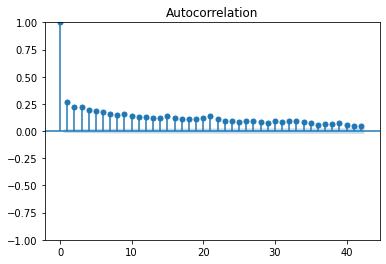

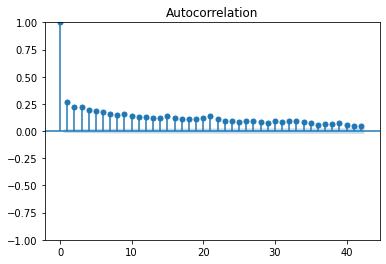

In [ ]:
# 1-5 해설
sm.graphics.tsa.plot_acf(result_model.resid)

답 : 파란색 구간을 벗어나는 시차가 존재하기 때문에 독립성을 만족하지않는다.

# Q2. weatherHistory.csv는 2006년부터 2016년까지 헝가리 Szeged 지방의 날씨 정보를 포함하는 데이터이다.
## 다음 물음에 답하시오.

**Q2-1. weatherHistory.csv를 weather 에 저장하고 변수 타입과 결측치 여부를 확인하시오.**

In [9]:
# 2-1 해설
weather = pd.read_csv("/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/2주차_230315/복습과제/data/weatherHistory.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


**Q2-2. Apparent temperature(체감온도)를 반응변수로 하여 선형회귀분석을 수행하려고 한다. 분석에 앞서 산점도와 히트맵을 통해 변수들 사이의 관계를 확인하시오.**

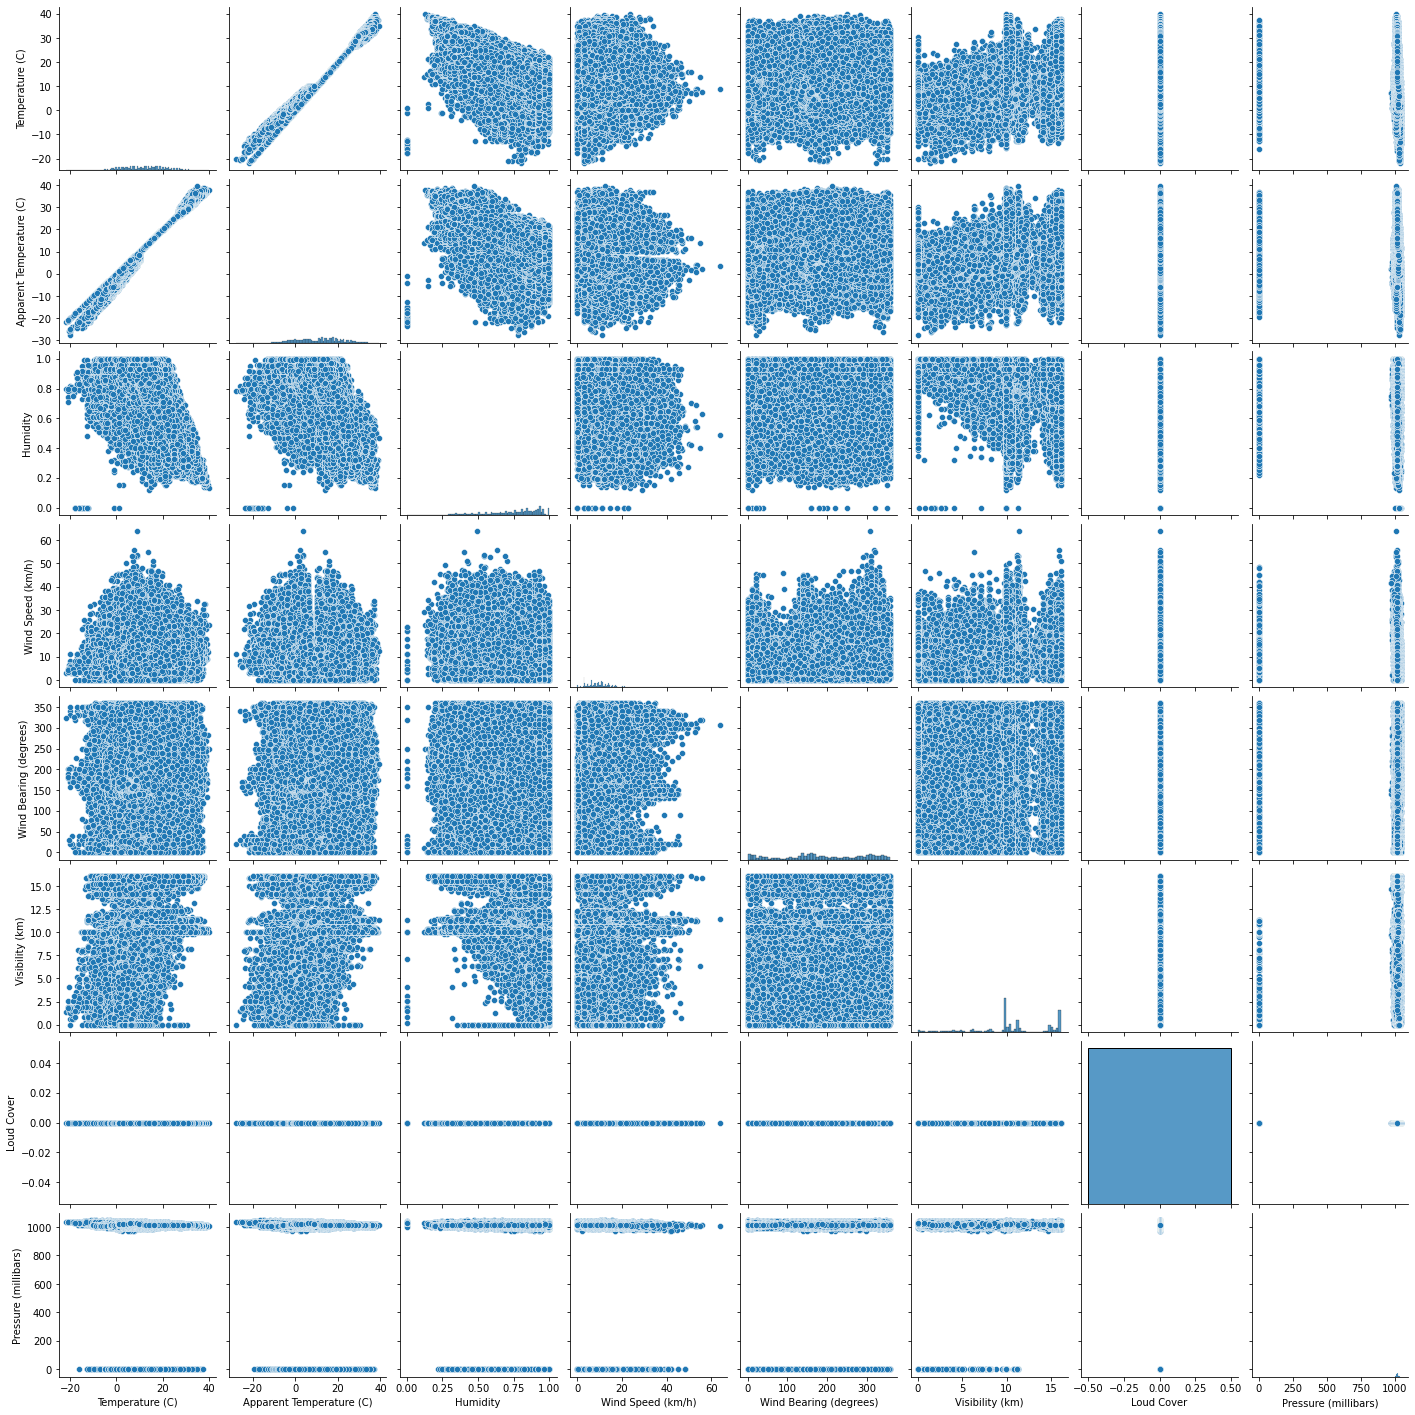

In [10]:
# 2-2 해설
sns.pairplot(weather)
plt.show()

**Q2-3. Apparent temperature(체감온도)를 반응변수로, Temperature(섭씨온도), Humidity(습도), Wind Speed(풍속)을 설명변수로 하여 회귀식을 적합하시오.**

In [11]:
# 2-3 해설
X = weather[["Temperature (C)", "Humidity", "Wind Speed (km/h)"]]
y = weather["Apparent Temperature (C)"]

X = sm.add_constant(X, has_constant="add")

multi_linear_model = sm.OLS(y,X)
result_model = multi_linear_model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Apparent Temperature (C)   R-squared:                       0.990
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                 3.124e+06
Date:                      Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                              18:45:43   Log-Likelihood:            -1.4425e+05
No. Observations:                     96453   AIC:                         2.885e+05
Df Residuals:                         96449   BIC:                         2.886e+05
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3303      0.024    -96.474      0.000      -2.378      -2.283
Temperature (C)       1.1259      0.000   2359.067      0.000       1.125       1.127
Humidity              1.0554      0.024     44.098      0.000       1.009       1.102
Wind Speed (km/h)    -0.0949      0.001   -180.944      0.000      -0.096      -0.094
==============================================================================
Omnibus:                     1781.332   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1966.073
Skew:                           0.307   Prob(JB):                         0.00
Kurtosis:                       3.337   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Q2-4. 모델의 설명력이 어떠한지 adjusted R square를 보고 설명하시오. p-value를 이용해 회귀계수의 유의성을 검정하고 각 설명변수가 모델에 유의한 영향을 끼친다고 할 수 있는지 판단하시오.**

답: adjusted R square가 1에 근접하므로 설명력이 매우 좋은 모델이라고 할 수 있다. p value도 0.05보다 작아 모든 설명변수가 모델에 유의미한 영향을 미친다.

**Q2-5. QQ plot, 잔차 그래프를 각각 그린 후 모델이 오차의 정규성, 등분산성 가정을 만족하는지 살펴보시오.**

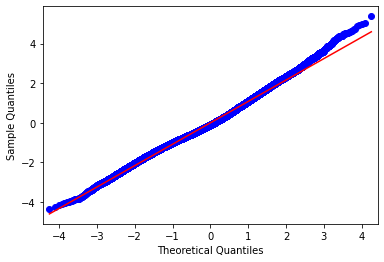

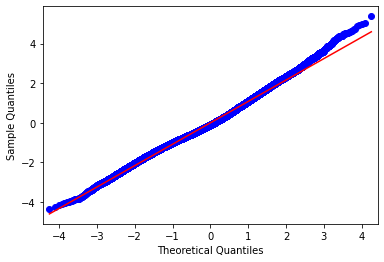

In [12]:
#정규성
sm.qqplot(result_model.resid, line="s")

답: QQ plot이 거의 직선 형태를 보이므로 정규성을 만족한다.

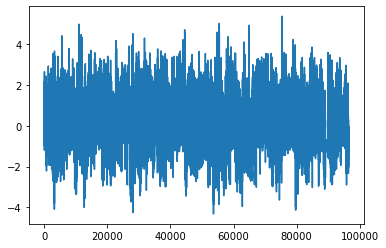

In [13]:
#등분산성
result_model.resid.plot()
plt.show()

답: 잔차가 거의 일정한 폭으로 분포하고 있으므로 등분산성이 만족된다.

# Q3. 다이아몬드에 관심이 많은 혜정이를 도와 다이아몬드 가격 예측기를 만들어보자.

혜정이는 건달 오빠로부터 diamond 데이터를 얻어왔다.

**Q3-1. diamond.csv 데이터를 불러와 data 변수에 할당하시오.**

In [3]:
data = pd.read_csv('/Users/parksoyeon/Desktop/비타민/멤버세션_1학기/2주차_230315/복습과제/data/diamonds.csv', )
data.drop('Unnamed: 0', axis = 1, inplace=True)
data = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']]
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757


혜정이는 상관계수 0.8 이상의 변수만 선택해 가격을 예측하려고 한다.

**Q3-2. price와의 상관계수를 큰 순서대로 나열하고, 상관계수의 값이 0.8 이상인 feature만 선택해 변수 X에 저장하시오.**

In [5]:
data.corr()['price'][:-1].sort_values(ascending=False)

carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [6]:
X = data.iloc[:,:-1]
X.drop(['cut', 'color', 'clarity', 'depth', 'table'], axis = 1, inplace = True)

설레는 마음으로 혜정이는 model을 만들고 결과를 보려고 한다.

**Q3-3. 다중선형회귀 model을 fit하고 summary 결과를 출력하시오.**

In [7]:
X = sm.add_constant(X, has_constant='add')
y = data.iloc[:,-1]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:50:17   Log-Likelihood:            -4.7187e+05
No. Observations:               53940   AIC:                         9.437e+05
Df Residuals:                   53935   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1921.1740    104.373     18.407      0.000    1716.601    2125.747
carat       1.023e+04     62.937    162.607      0.000    1.01e+04    1.04e+04
x           -884.2091     40.470    -21.848      0.000    -963.532    -804.887
y            166.0384     25.858      6.421      0.000     115.356     216.721
z           -576.2035     39.282    -14.668      0.000    -653.197    -499.210
==============================================================================
Omnibus:                    14400.324   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           336485.128
Skew:                           0.743   Prob(JB):                         0.00
Kurtosis:                      15.145   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

혜정이는 지나가던 동은이에게 무겁고 비싼 다이아가 당연히 더 적지 않겠냐는 잔소리를 듣고 이를 반영해보려 한다.

**Q3-4. carat과 price 분포를 확인해보고, 두 feature의 적절한 분포 변환을 적용하여 새로운 model의 결과를 출력하시오.**

<AxesSubplot:>

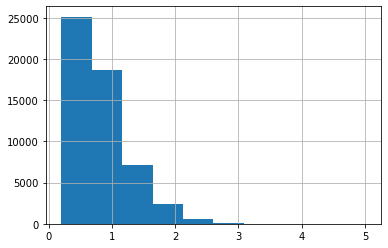

In [8]:
data['carat'].hist()

<AxesSubplot:>

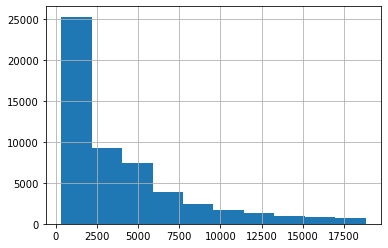

In [9]:
data['price'].hist()

In [10]:
X['carat'] = np.log(X['carat'])
y = np.log(y)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.884e+05
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:51:09   Log-Likelihood:                -4335.0
No. Observations:               53940   AIC:                             8680.
Df Residuals:                   53935   BIC:                             8724.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0404      0.048    167.403      0.000       7.946       8.134
carat          1.5563      0.014    109.638      0.000       1.528       1.584
x              0.0693      0.009      8.121      0.000       0.053       0.086
y              0.0242      0.004      5.440      0.000       0.015       0.033
z             -0.0493      0.007     -7.161      0.000      -0.063      -0.036
==============================================================================
Omnibus:                      969.809   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1924.455
Skew:                           0.077   Prob(JB):                         0.00
Kurtosis:                       3.912   Cond. No.                         406.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

혜정이는 다이아몬드에서 cut, clarity의 변수가 중요하다는 것을 경험적으로 알고 있어, 이 변수를 사용하지 않은 것이 너무 아쉽다.

마침 연진이한테 판다스의 get_dummies 함수가 있다는 것을 배웠던 것이 기억났다.

**Q3-5. cut, clarity featrue를 이전(분포를 변형한) X에 포함하여 새로운 X를 new_X에 할당하시오.**

In [11]:
dummy = pd.get_dummies(data[['cut', 'clarity']], columns = ['cut', 'clarity'])
new_X = pd.concat([X,dummy],axis=1)

**Q3-5. 새로운 model1의 결과를 출력하고, 이전 model과의 R2 값을 비교해보시오.**

In [12]:
model1 = sm.OLS(y, new_X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.037e+05
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:52:01   Log-Likelihood:                 14278.
No. Observations:               53940   AIC:                        -2.852e+04
Df Residuals:                   53924   BIC:                        -2.838e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.5709      0.026    250.286      0.000       6.519       6.622
carat             1.8828      0.010    182.013      0.000       1.862       1.903
x                -0.0226      0.006     -3.628      0.000      -0.035      -0.010
y                -0.0011      0.003     -0.353      0.724      -0.007       0.005
z                -0.0218      0.005     -4.415      0.000      -0.031      -0.012
cut_Fair          1.2099      0.006    192.368      0.000       1.198       1.222
cut_Good          1.2958      0.006    229.648      0.000       1.285       1.307
cut_Ideal         1.3786      0.006    244.804      0.000       1.368       1.390
cut_Premium       1.3527      0.006    233.195      0.000       1.341       1.364
cut_Very Good     1.3340      0.006    239.677      0.000       1.323       1.345
clarity_I1        0.1305      0.007     18.371      0.000       0.117       0.144
clarity_IF        1.1945      0.005    224.002      0.000       1.184       1.205
clarity_SI1       0.7185      0.004    198.905      0.000       0.711       0.726
clarity_SI2       0.5764      0.004    149.281      0.000       0.569       0.584
clarity_VS1       0.9089      0.004    236.010      0.000       0.901       0.916
clarity_VS2       0.8639      0.004    234.280      0.000       0.857       0.871
clarity_VVS1      1.1126      0.005    246.621      0.000       1.104       1.121
clarity_VVS2      1.0656      0.004    253.442      0.000       1.057       1.074
==============================================================================
Omnibus:                     1011.057   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1845.038
Skew:                          -0.135   Prob(JB):                         0.00
Kurtosis:                       3.865   Cond. No.                     7.42e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.12e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

혜정이는 feature가 너무 많아지자 다른 방식으로 cut, clarity feature를 이용하는 방법에 대해 고민을 하고 있다.

경험적으로 cut과 clarity 등급이 높을수록 가격이 선형적으로 비싸질 것이라는 생각으로

가장 낮은 등급을 1로 시작해 1개의 등급이 오를수록 1씩 선형적으로 커지는 방식으로 feature를 수정해보기로 했다.

* Cut : Fair, Good, Very Good, Premium, Ideal
* Clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

**Q3-7. 혜정이의 방식으로 cut, clarity feature를 수정해 새로운 X를 last_X에 할당하시오.
(이전 carat, price의 분포 변환 그대로 적용)**

In [14]:
last_X = data.iloc[:,:-1]
last_X['carat'] = np.log(last_X['carat'])
last_X.drop(['color', 'depth', 'table'], axis = 1, inplace = True)
last_X['cut'] = [1 if x == 'Fair' else 2 if x == 'Good' else 3 if x == 'Very Good' else 4 if x == 'Premium' else 5 for x in last_X['cut']]
last_X['clarity'] = [1 if x == 'l1' else 2 if x == 'SI2' else 3 if x == 'SI1' else 4 if x == 'VS2' else 5 if x == 'VS1' else 6 if x == 'VVS2' else 7 if x == 'VVS1' else 8 for x in last_X['clarity']]

**Q3-8. 새로운 model2의 결과를 출력하고, 이전 model들과의 R2 값을 비교해보시오.**

In [16]:
last_X = sm.add_constant(last_X, has_constant='add')
model2 = sm.OLS(y, last_X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.745e+05
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:53:04   Log-Likelihood:                 4024.7
No. Observations:               53940   AIC:                            -8035.
Df Residuals:                   53933   BIC:                            -7973.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1342      0.021    200.508      0.000       4.094       4.175
const          4.1342      0.021    200.508      0.000       4.094       4.175
carat          1.8432      0.012    148.631      0.000       1.819       1.868
cut            0.0436      0.001     48.757      0.000       0.042       0.045
clarity        0.0780      0.001    126.526      0.000       0.077       0.079
x             -0.0336      0.007     -4.541      0.000      -0.048      -0.019
y              0.0147      0.004      3.856      0.000       0.007       0.022
z             -0.0393      0.006     -6.646      0.000      -0.051      -0.028
==============================================================================
Omnibus:                    13288.888   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70867.350
Skew:                          -1.087   Prob(JB):                         0.00
Kurtosis:                       8.178   Cond. No.                     4.79e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.7e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

혜정이는 오히려 R2의 값이 줄어든 상황을 보고 좌절에 빠졌다.

**Q3-9. 오히려 R2의 값이 줄어든 원인이 무엇이라고 생각하는지 작성하시오.**

답 : 등급간 순서와 대소 차이가 존재는 하나 선형 관계가 아닌 feature를 강제로 선형적 변환을 한 상황일 것이다.

# Q4. 혜정이를 도와 다이아몬드 가격 예측 회귀모델의 가정을 진단해보자.

혜정이는 본인이 만들어낸 선형회귀분석 모델이 오차에 대한 정규성, 독립성, 등분산성을 만족하는지 진단하고 신뢰성이 높은 가격 예측기를 만들고 싶다.

혜정이를 도와 정규성 진단을 진행하자. 혜정이는 BITAmin에서 배운 Q-Q plot을 이용하여 정규성을 검정하고자 한다.

**Q4-1. Q-Q plot을 통해 정규성을 진단하고, 결과를 해석하시오. (model1사용)**

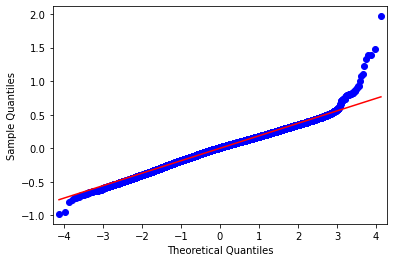

In [17]:
qqplot = sm.qqplot(model1.resid, line = 's')

Q-Q plot의 결과를 본 사라는 scatter plot을 이용하면 잔차의 패던 역시 확인할 수 있다고 알려준다.

**Q4-2. scatter plot을 활용한 잔차 패턴을 통해 정규성을 진단하시오.**

Text(0, 0.5, 'Residual')

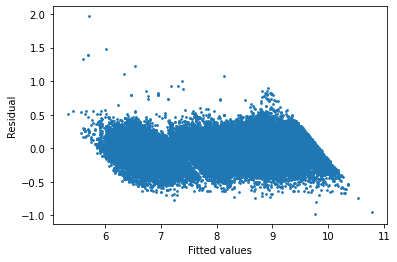

In [18]:
fitted = model1.predict()

resid = model1.resid
pred = model1.predict(new_X)
fig = plt.scatter(pred, resid, s=3)

plt.xlabel('Fitted values')
plt.ylabel('Residual')

잔차패턴을 만들었지만 혜정이는 정규성을 확인하는 방법을 모른다. 지나가던 의사친구 여정이가 혀를 끌끌차며, Shapiro-Wilk 검정을 사용하면 정규성을 p-value를 사용해서 검정할 수 있음을 일러준다.

**Q4-3. Shapiro-Wilk 검정을 통해 정규성을 검정하시오.**

In [19]:
result_shapiro = stats.shapiro(model1.resid)
print(f'F value : {result_shapiro[0]:.4f} / p-value : {result_shapiro[1]:.4f}')

if result_shapiro[1] < 0.05:
  print("p-value < 0.05입니다.")

F value : 0.9933 / p-value : 0.0000
p-value < 0.05입니다.


혜정이는 자신이 만든 다이아몬드 가격 예측 모델의 정규성에 대한 가정을 만족함을 알고 독립성 진단을 시행하고자한다.

**Q4-4. 잔차 그래프를 통해 독립성을 진단하고, 결과를 해석하시오.**

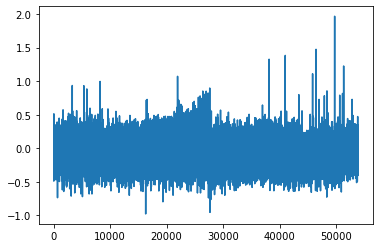

In [20]:
model1.resid.plot()
plt.show()

결과 해석: 그래프에서 큰 경향성을 파악할 수 없기에 독립성 조건을 만족한다고 볼 수 있다.

도영이가 오차에 대한 가정진단을 하고 있는 혜정이를 보며, 아직 등분산성 가정진단을 진행해야한다고 알려주었다. 

**Q4-5. Breusch-Pagan 검정을 사용하여 등분산성을 진단하고 혜정이가 이 모형을 그대로 사용해도 될지 안될지 알려주자.**

In [21]:
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan

# Breusch-Pagan 검정
bp_test = het_breuschpagan(model1.resid, model1.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(lzip(labels, bp_test))

[('LM Statistic', 2217.0199137252976), ('LM-Test p-value', 0.0), ('F-Statistic', 154.09086590178504), ('F-Test p-value', 0.0)]


결과해석: 결과를 보면 LM-Test p-value와 F-Test p-value 모두 0에 매우 가까운 아주 작은 값이 나왔습니다. 이는 귀무가설이 "잔차들은 등분산성을 가진다"는 것인 경우에 대한 유의확률(p-value)이 아주 작다는 것을 의미합니다. 따라서, 귀무가설을 기각할 수 있으며, 즉 잔차들이 등분산성을 가지지 않는다는 것을 의미합니다.

따라서, 이 모형은 등분산성 가정이 위배된다는 것을 의미하며, 이 경우 회귀분석 결과가 왜곡될 수 있으므로 혜정이는 다른 모형이나 잔차 변환 등의 대안을 고려해야합니다.